In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./..")

In [4]:
from pathlib import Path
import pprint
import hashlib

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from dotted_dict import DottedDict

In [5]:
#np.set_printoptions(threshold=sys.maxsize)

In [6]:
ds_train = datasets.MNIST(root='./data', train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root="./data", train=False, download=True, transform=T.ToTensor())

In [7]:
ds_train = datasets.MNIST(root='./data', train=True, download=True)
ds_valid = datasets.MNIST(root="./data", train=False, download=True)

In [8]:
ds_train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x20D3448B790>, 5)

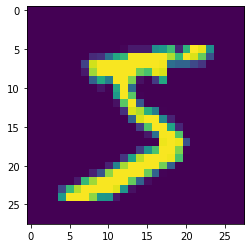

In [9]:
plt.imshow(ds_train[0][0])

### Padding


In [10]:
pad = T.Pad(padding=[2,2,2,2])(ds_train[0][0])
#0 & 2 -> x
#1 & 3 -> y

In [11]:
print(pad)

<PIL.Image.Image image mode=L size=32x32 at 0x20D4A9CBBB0>


In [12]:
np.random.randint(1, high=5, size=None, dtype=int)

3

### Random Pads

In [13]:
def pad_rand():
    ref = 8
    left = np.random.randint(1, high=9, size=None, dtype=int)
    rigth = ref - left
    up = np.random.randint(1, high=9, size=None, dtype=int)
    down = ref - up
    
    return [left, up, rigth, down]
    

In [14]:
pad_rand()

[3, 1, 5, 7]

In [15]:
pad_0 = T.Pad(padding=pad_rand())(ds_train[0][0])

In [16]:
pr = np.array(pad_0)
print(pr)
print(pr.shape)
print(pr.max())
print(pr.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(36, 36)
255
0


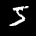

In [21]:
pad_0

In [17]:
pad_42 = T.Pad(padding=pad_rand())(ds_train[42][0])

In [18]:
pr = np.array(pad_42)
print(pr)
print(pr.shape)
print(pr.max())
print(pr.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(36, 36)
255
0


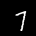

In [19]:
pad_42

In [85]:
a = np.array(pad_42)
b = np.array(pad_0)
add = a + b 

In [23]:
pr = add
print(pr)
print(pr.shape)
print(pr.max())
print(pr.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(36, 36)
255
0


In [24]:
pil = Image.fromarray(add, mode='L')

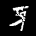

In [25]:
pil

In [28]:
rec = add - np.array(pad_0)

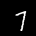

In [29]:
Image.fromarray(rec, mode='L')

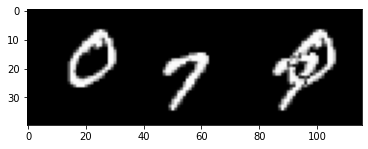

In [109]:
pad_1 = T.Pad(padding=pad_rand())(ds_train[1][0])
pad_15 = T.Pad(padding=pad_rand())(ds_train[15][0])

a = np.array(pad_1)
b = np.array(pad_15)
add = a + b
pil = Image.fromarray(add, mode='L')

i1 = T.ToTensor()(pad_1)
i2 = T.ToTensor()(pad_15)
i3 = T.ToTensor()(pil)
cat = torch.cat([i1,i2,i3], dim=0)
cat = cat.unsqueeze(1)
grid = torchvision.utils.make_grid(cat, nrow=3)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

In [131]:
pad_1 = T.Pad(padding=pad_rand())(ds_train[1][0])
pad_15 = T.Pad(padding=pad_rand())(ds_train[15][0])

a = T.ToTensor()(pad_1)
b = T.ToTensor()(pad_15)
add = torch.clamp(a + b,min=0, max=1)
pil = T.ToPILImage()(add)

#i1 = T.ToTensor()(pad_1)
#i2 = T.ToTensor()(pad_15)
#i3 = T.ToTensor()(pil)
cat = torch.cat([a,b,add], dim=0)
cat = cat.unsqueeze(1)
grid = torchvision.utils.make_grid(cat, nrow=3)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

### generate from tensor

In [136]:
ds_train = datasets.MNIST(root='./data', train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root="./data", train=False, download=True, transform=T.ToTensor())

In [137]:
ds_train[0][0].size()

torch.Size([1, 28, 28])

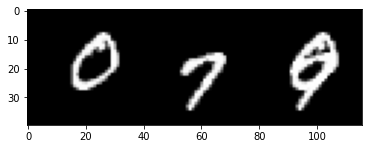

In [143]:
pad_1 = T.Pad(padding=pad_rand())(ds_train[1][0])
pad_15 = T.Pad(padding=pad_rand())(ds_train[15][0])

a = pad_1
b = pad_15
add = torch.clamp(a + b,min=0, max=1)

cat = torch.cat([a,b,add], dim=0)
cat = cat.unsqueeze(1)
grid = torchvision.utils.make_grid(cat, nrow=3)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

In [145]:
n = 100
size = 10
np.random.randint(1, high=n, size=size, dtype=int)

array([59, 99, 49, 35, 81, 63, 46, 94, 75, 14])

In [208]:
np.random.seed(seed=0)

img, label = ds_train.data, ds_train.targets
img = img[:10]
label = label[:10]
n_multi = 3

ref = 7
i_ref = ds_train.data[ref]
l_ref = ds_train.targets[ref]
indexes = np.where(label != l_ref)[0]
indexes = np.random.choice(indexes,n_multi,replace=False)


print(l_ref)
print(label)
print(indexes)
print(label[indexes[0]],label[indexes[1]],label[indexes[2]])






tensor(3)
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])
[8 2 1]
tensor(1) tensor(4) tensor(0)


In [146]:
def pad_rand():
    ref = 8
    left = np.random.randint(1, high=9, size=None, dtype=int)
    rigth = ref - left
    up = np.random.randint(1, high=9, size=None, dtype=int)
    down = ref - up
    
    return [left, up, rigth, down]



In [235]:
def multimatch(images, labels, ref_idx, n=1000):
    #reference img
    img_ref = images[ref_idx]
    lab_ref = labels[ref_idx]
    
    #choose random top images from different classes
    top_idx = np.where(labels != lab_ref)[0]
    top_idx = np.random.choice(top_idx,n,replace=False)

    all_imgs = []
    all_targets1 = []
    all_targets2 = []

    for i, idx in enumerate(top_idx):
        
        base  = T.Pad(padding=pad_rand())(images[ref_idx])
        top   = T.Pad(padding=pad_rand())(images[top_idx[i]])

        merge = torch.clamp(base + top,min=0, max=1)
        merge = merge.unsqueeze(0)
        label1 = labels[ref_idx]
        label2 = labels[top_idx[i]]
        
        all_imgs.append(merge)
        all_targets1.append(label1)
        all_targets2.append(label2)
    
    return all_imgs, all_targets1, all_targets2

img, label1, label2 = multimatch(images=ds_train.data, labels=ds_train.targets, ref_idx=0, n=20)
print(len(img), "\n", label1, "\n", label2)

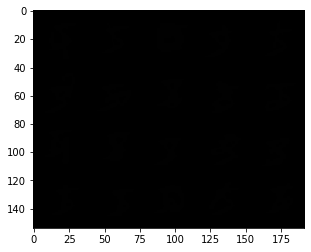

In [239]:
grid = torchvision.utils.make_grid(img, nrow=5)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

tensor(5)
tensor(2)


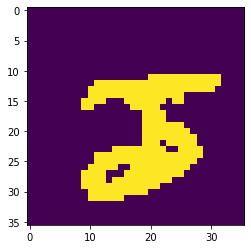

In [250]:
jj = 9
print(label1[jj])
print(label2[jj])
plt.imshow(img[jj].permute(1, 2, 0))